# Final Project - IT Job - Gold

### Tasks
1. Read Dataframe from sliver parquet.
2. Calculate the popularity ranking of specialisations, generate graph.
3. Calculate the popularity ranking of additional specialisation, generate graph.

4. Calculate the popularity ranking of certifications, generate graph.
5. Plot the correlation between certification and salary
6. Plot the demand distribution graph for the top 10 specializations and top 5 countries and avarage salary
7. Calculate the distribution of demand for different specialisations in different countries, generate graph.
8. Calculate the distribution of salary for different specialisations in different countries, generate graph.

## Setup

In [0]:
%pip uninstall -y databricks_helpers exercise_ev_databricks_unit_tests
%pip install git+https://github.com/data-derp/databricks_helpers#egg=databricks_helpers git+https://github.com/data-derp/exercise_ev_databricks_unit_tests#egg=exercise_ev_databricks_unit_tests

# Constant
silver_output_directory="dbfs:/FileStore/DataPandas/silver/output"
silver_itjob_path=f"{silver_output_directory}/itjob"

working_directory="dbfs:/FileStore/DataPandas/gold"
output_dir = f"{working_directory}/output"
dbutils.fs.mkdirs(working_directory)
print("Contents of working dir:")
dbutils.fs.ls(f"{working_directory}")

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Found existing installation: databricks-helpers 0.1.0
Uninstalling databricks-helpers-0.1.0:
  Successfully uninstalled databricks-helpers-0.1.0
Found existing installation: exercise-ev-databricks-unit-tests 0.1.0
Uninstalling exercise-ev-databricks-unit-tests-0.1.0:
  Successfully uninstalled exercise-ev-databricks-unit-tests-0.1.0
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Cloning https://github.com/data-derp/databricks_helpers to /tmp/pip-install-ab8k6v_n/databricks-helpers_8502ae0a1cda49b6af16b82fbba1bf99
  Running command git clone --filter=blob:none --quiet https://github.com/data-derp/databricks_helpers /tmp/pip-install-ab8k6v_n/databricks-helpers_8502ae0a1cda49b6af16b82fbba1bf99
  Resolved https://github.com/dat

[]

## Read Dataframe from sliver parquet

In [0]:
from pyspark.sql import DataFrame

def read_parquet(filepath: str) -> DataFrame:
    df = spark.read.format("parquet").load(filepath)
    return df

# Read inspected data frame from silver
itjob_df = read_parquet(silver_itjob_path)

display(itjob_df)

jobid country salary_from salary_to currency specialisation additional_specialisation certification 10234 Philippines 21000 24000 PHP IT Support null null 19844 Singapore 2500 3000 SGD IT Support null null 17749 Australia 140000 170000 AUD ERP Finance Project Management certifications 24320 Australia 95747 101669 AUD Telecommunications Electronics Open Cabling Registration with Structured/Coaxial Cable and Optical Fibre endorsements 24320 Australia 95747 101669 AUD Telecommunications Radiocommunications Open Cabling Registration with Structured/Coaxial Cable and Optical Fibre endorsements 21527 Australia 85906 93915 AUD Financial Analysis Budget Management null 21527 Australia 85906 93915 AUD Financial Analysis Financial Reporting null 624 Malaysia 3500 5000 MYR Application Support Cloud Technology null 11833 Indonesia 6750000 10000000 IDR .NET C# null 11833 Indonesia 6750000 10000000 IDR .NET ASP.NET null 2589 Philippines 30000 35000 PHP IT Support null Microsoft (except Azure) 2589 Philippines 30000 35000 PHP IT Support null Microsoft (except Azure) 2589 Philippines 30000 35000 PHP IT Support null MTA 2589 Philippines 30000 35000 PHP IT Support null Cisco (CCNA/CCNP/CCIE) 2589 Philippines 30000 35000 PHP IT Support null CompTIA (A+/Network+/Linux+/Security+) 11597 Hong Kong 35000 40000 HKD Frontend Development E-commerce null 18672 Philippines 45000 60000 PHP SIP Network QOS MiVoice Call Recording 18672 Philippines 45000 60000 PHP SIP Network QOS MiVoice Office 250 18672 Philippines 45000 60000 PHP SIP Network QOS MiContact Center Office 18672 Philippines 45000 60000 PHP SIP Network QOS MiContact Center Business 18672 Philippines 45000 60000 PHP SIP Network QOS Micollab 18672 Philippines 45000 60000 PHP SIP Network QOS MiVoice Border Gateway 18672 Philippines 45000 60000 PHP SIP Network QOS MiVoice Business Hospitality 18672 Philippines 45000 60000 PHP SIP Network QOS MiVoice Business Networking 18672 Philippines 45000 60000 PHP SIP Network QOS MiVoice Business Advanced 18672 Philippines 45000 60000 PHP SIP Network QOS MiVoice Business Core 18672 Philippines 45000 60000 PHP SIP Network QOS Mitel Certification 18672 Philippines 45000 60000 PHP SIP Network QOS Cisco (CCNA/CCNP/CCIE) 18672 Philippines 45000 60000 PHP SIP Network QOS Cisco (CCNA/CCNP/CCIE) 18672 Philippines 45000 60000 PHP SIP Network QOS Cisco (CCNA/CCNP/CCIE) 18672 Philippines 45000 60000 PHP SIP Network QOS SSCA SIP 18672 Philippines 45000 60000 PHP SIP Network QOS SIP Certification 18672 Philippines 45000 60000 PHP SIP VoIP MiVoice Call Recording 18672 Philippines 45000 60000 PHP SIP VoIP MiVoice Office 250 18672 Philippines 45000 60000 PHP SIP VoIP MiContact Center Office 18672 Philippines 45000 60000 PHP SIP VoIP MiContact Center Business 18672 Philippines 45000 60000 PHP SIP VoIP Micollab 18672 Philippines 45000 60000 PHP SIP VoIP MiVoice Border Gateway 18672 Philippines 45000 60000 PHP SIP VoIP MiVoice Business Hospitality 18672 Philippines 45000 60000 PHP SIP VoIP MiVoice Business Networking 18672 Philippines 45000 60000 PHP SIP VoIP MiVoice Business Advanced 18672 Philippines 45000 60000 PHP SIP VoIP MiVoice Business Core 18672 Philippines 45000 60000 PHP SIP VoIP Mitel Certification 18672 Philippines 45000 60000 PHP SIP VoIP Cisco (CCNA/CCNP/CCIE) 18672 Philippines 45000 60000 PHP SIP VoIP Cisco (CCNA/CCNP/CCIE) 18672 Philippines 45000 60000 PHP SIP VoIP Cisco (CCNA/CCNP/CCIE) 18672 Philippines 45000 60000 PHP SIP VoIP SSCA SIP 18672 Philippines 45000 60000 PHP SIP VoIP SIP Certification 22934 Hong Kong 20000 30000 HKD Testing & Quality Assurance Manual Testing null 22934 Hong Kong 20000 30000 HKD Testing & Quality Assurance Automation null 27865 Philippines 45000 60000 PHP VoIP Networking MiVoice Call Recording 27865 Philippines 45000 60000 PHP VoIP Networking MiVoice Office 250 27865 Philippines 45000 60000 PHP VoIP Networking MiContact Center Office 27865 Philippines 45000 60000 PHP VoIP Networking MiContact Center Business 27865 Philippines 45000 

In [0]:
itjob_df.printSchema()
#itjob_df.show()

root
 |-- jobid: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- salary_from: integer (nullable = true)
 |-- salary_to: integer (nullable = true)
 |-- currency: string (nullable = true)
 |-- specialisation: string (nullable = true)
 |-- additional_specialisation: string (nullable = true)
 |-- certification: string (nullable = true)



image.png

## Calculate the popularity ranking of specialisations, generate graph

To calculate the popularity ranking of specialisations and generate a graph, you can follow the steps below:

1. Group the data by the specialisation column.
2. Count the number of occurrences for each specialisation.
3. Sort the specialisations based on the count in descending order.
4. Create a bar chart or any other suitable graph to visualize the popularity ranking.

Here is an example code snippet to perform these steps:


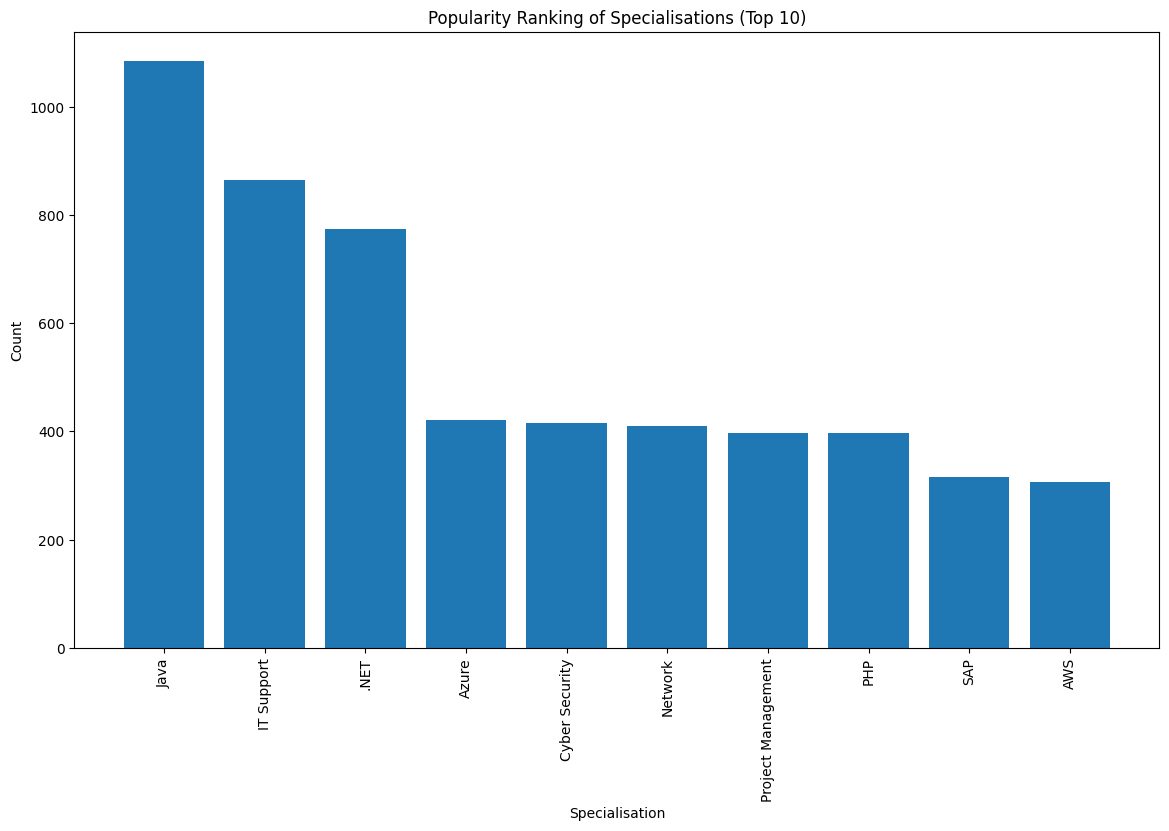

In [0]:
import matplotlib.pyplot as plt

# Group by specialisation and count the occurrences
specialisation_counts = itjob_df.groupBy("specialisation").count()

# Sort by count in descending order
specialisation_counts = specialisation_counts.orderBy("count", ascending=False)

# Extract specialisation and count as separate lists
specialisations = specialisation_counts.select("specialisation").rdd.flatMap(lambda x: x).collect()
counts = specialisation_counts.select("count").rdd.flatMap(lambda x: x).collect()

# Limit the data to the top 10 specialisations for visualization
top_n = 10
specialisations = specialisations[:top_n]
counts = counts[:top_n]

# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Plot the popularity ranking graph for the top 10 specialisations
plt.bar(specialisations, counts)
plt.xlabel("Specialisation")
plt.ylabel("Count")
plt.title("Popularity Ranking of Specialisations (Top 10)")
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

## Calculate the popularity ranking of additional specialisation, generate graph

In [0]:
# Convert additional_specialisations and additional_counts to appropriate data types
import plotly.express as px

additional_specialisation_counts = (
    itjob_df.groupBy("additional_specialisation")
    .count()
    .orderBy("count", ascending=False)
    .limit(10)
)

fig = px.bar(
    data_frame=additional_specialisation_counts.toPandas(),
    x="additional_specialisation",
    y="count"
)
fig.update_layout(title="Popularity Ranking of Additional Specialisations (Top 10)")
fig.show()

## Calculate the popularity ranking of certifications, generate graph

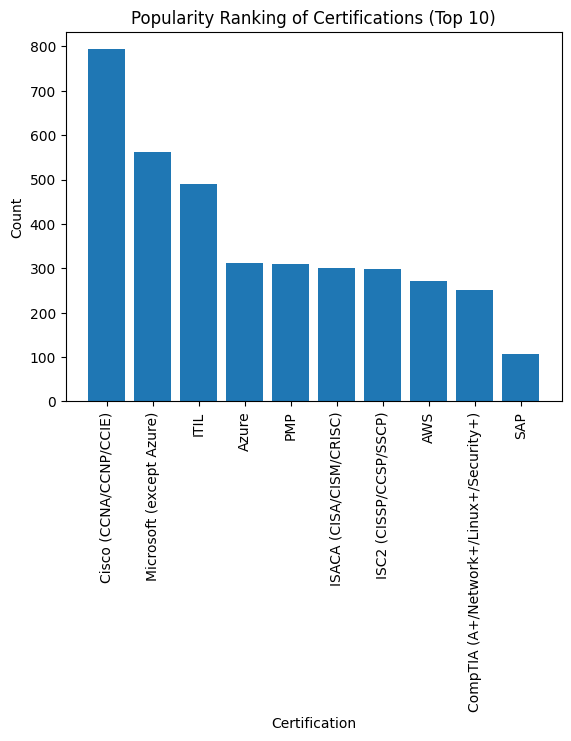

In [0]:
# Filter out rows with None values in the certification column
filtered_itjob_df = itjob_df.filter(itjob_df.certification.isNotNull())

# Group by certification and count the occurrences
certification_counts = filtered_itjob_df.groupBy("certification").count()

# Sort by count in descending order
certification_counts = certification_counts.orderBy("count", ascending=False).limit(10)

# Extract certification and count as separate lists
certifications = certification_counts.select("certification").rdd.flatMap(lambda x: x).collect()
counts = certification_counts.select("count").rdd.flatMap(lambda x: x).collect()

# Convert certifications to a list of strings
certifications = list(map(str, certifications))

# Convert counts to a list of integers
counts = list(map(int, counts))

# Plot the popularity ranking graph
plt.bar(certifications, counts)
plt.xlabel("Certification")
plt.ylabel("Count")
plt.title("Popularity Ranking of Certifications (Top 10)")
plt.xticks(rotation=90)
plt.show()

corelate certification to salary , generate graph



# Plot the correlation between certification and salary


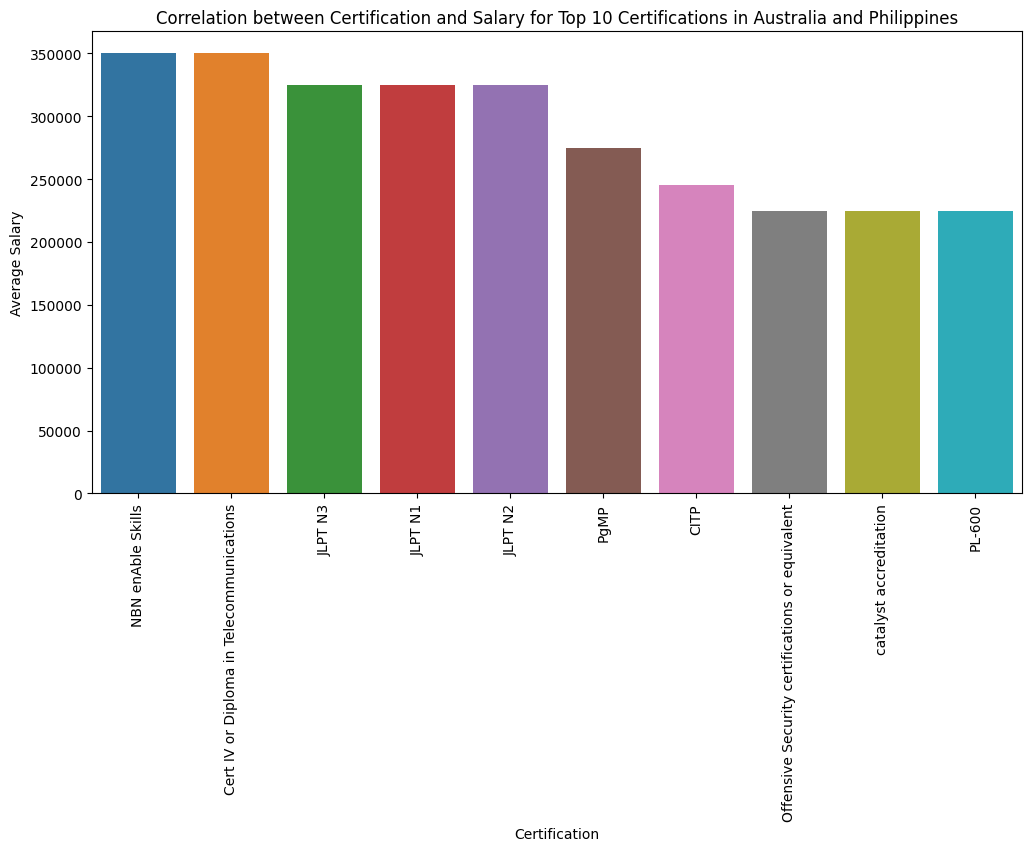

In [0]:
from pyspark.sql.functions import expr

# Filter the DataFrame for Australia and Philippines
australia_philippines_itjob_df = itjob_df.filter(itjob_df.country.isin(["Australia", "Philippines"]))

# Calculate the average salary for each certification for the top 10 specializations in Australia and Philippines
avg_salary_by_certification = australia_philippines_itjob_df.withColumn("avg_salary", expr("(salary_from + salary_to) / 2")) \
    .groupBy("certification") \
    .agg(avg(col("avg_salary")).alias("avg_salary"))

# Sort by average salary in descending order
avg_salary_by_certification = avg_salary_by_certification.orderBy("avg_salary", ascending=False).limit(10)

# Convert the DataFrame to a Pandas DataFrame for plotting
avg_salary_by_certification_pd = avg_salary_by_certification.toPandas()

# Plot the correlation between certification and salary for the top 10 certifications in Australia and Philippines
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_salary_by_certification_pd, x="certification", y="avg_salary")
plt.xlabel("Certification")
plt.ylabel("Average Salary")
plt.title("Correlation between Certification and Salary for Top 10 Certifications in Australia and Philippines")
plt.xticks(rotation=90)
plt.show()

Plot the demand distribution graph for the top 10 specializations and top 5 countries and avarage salary

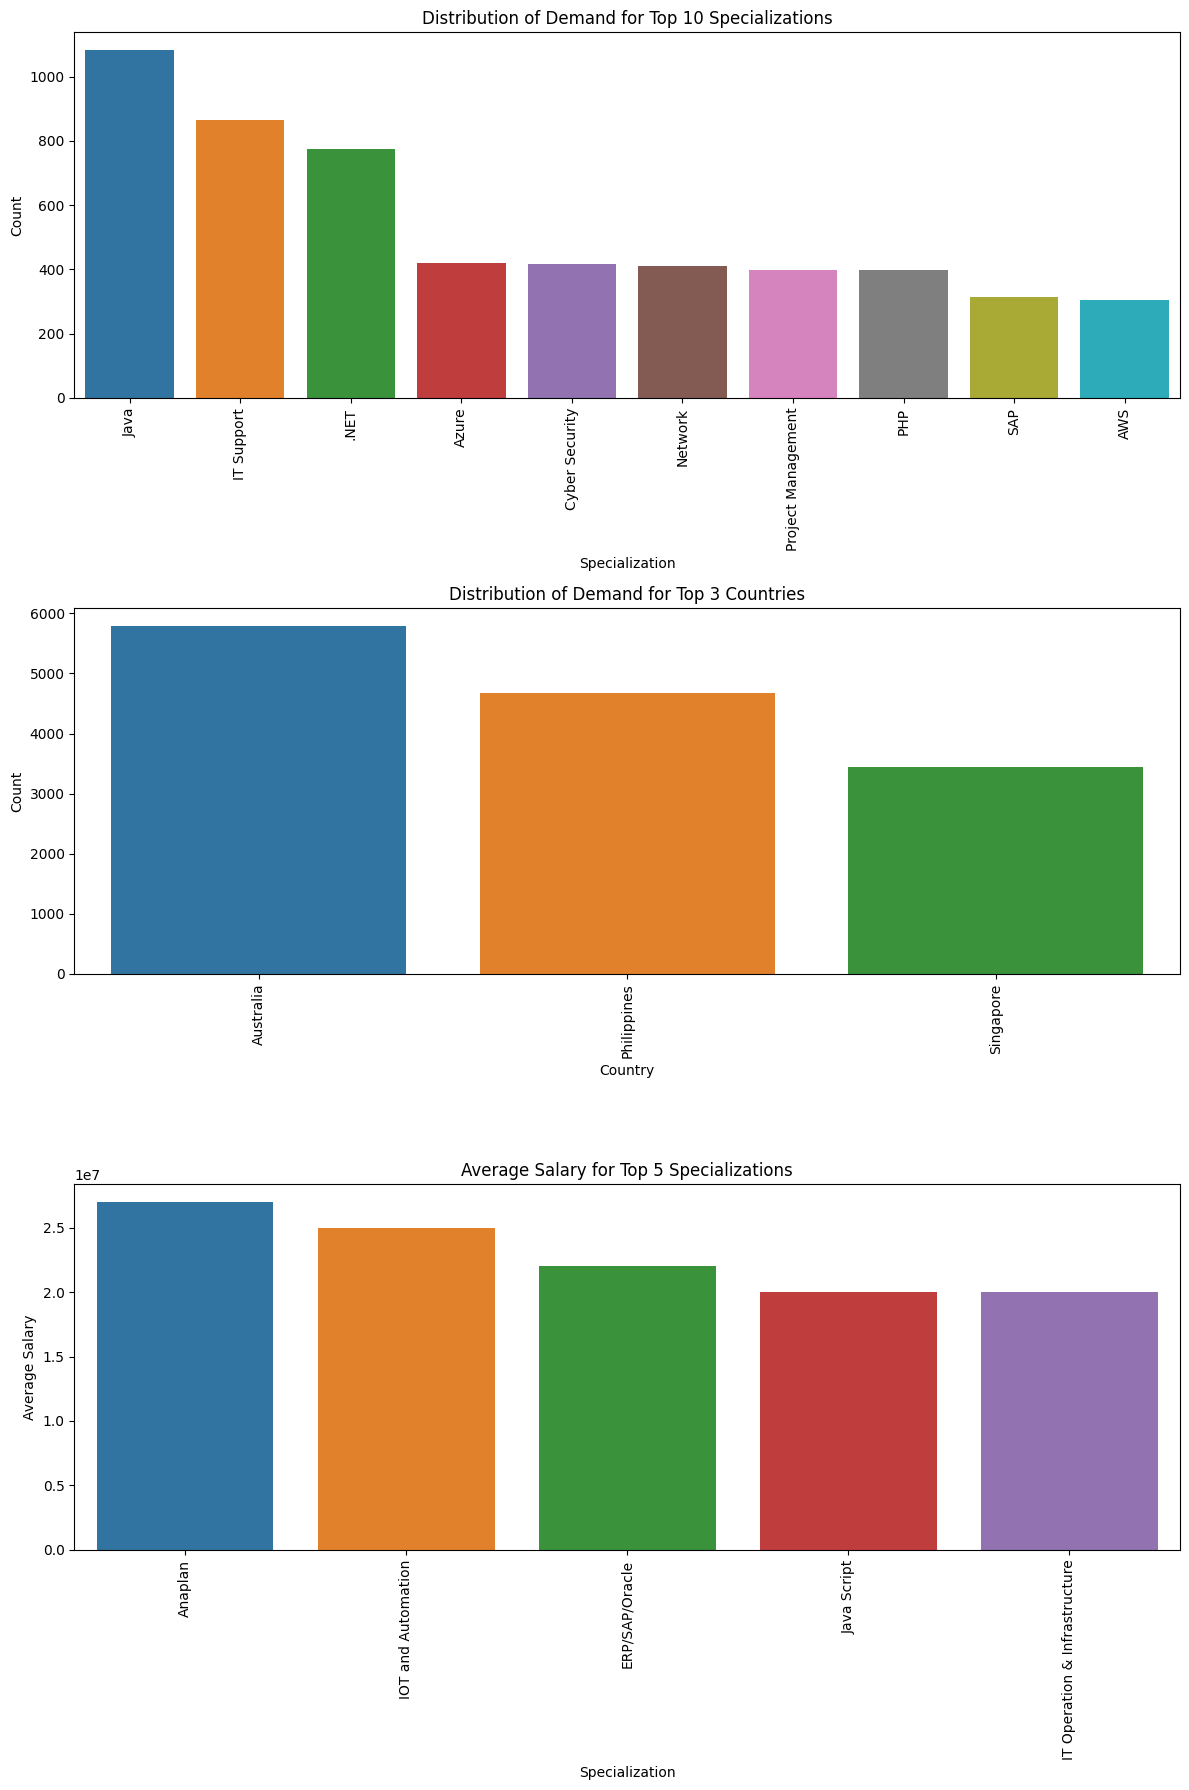

In [0]:
# Count the occurrences of each certification
certification_counts = itjob_df.groupBy("certification").count()

# Count the occurrences of each programming language
language_counts = itjob_df.groupBy("specialisation").count()

# Count the occurrences of each tool
tool_counts = itjob_df.groupBy("additional_specialisation").count()

# Convert the DataFrames to Pandas DataFrames for easy manipulation and visualization
certification_counts_pd = certification_counts.toPandas()
language_counts_pd = language_counts.toPandas()
tool_counts_pd = tool_counts.toPandas()

# View the certification counts
display(certification_counts_pd)

# View the language counts
display(language_counts_pd)

# View the tool counts
display(tool_counts_pd)

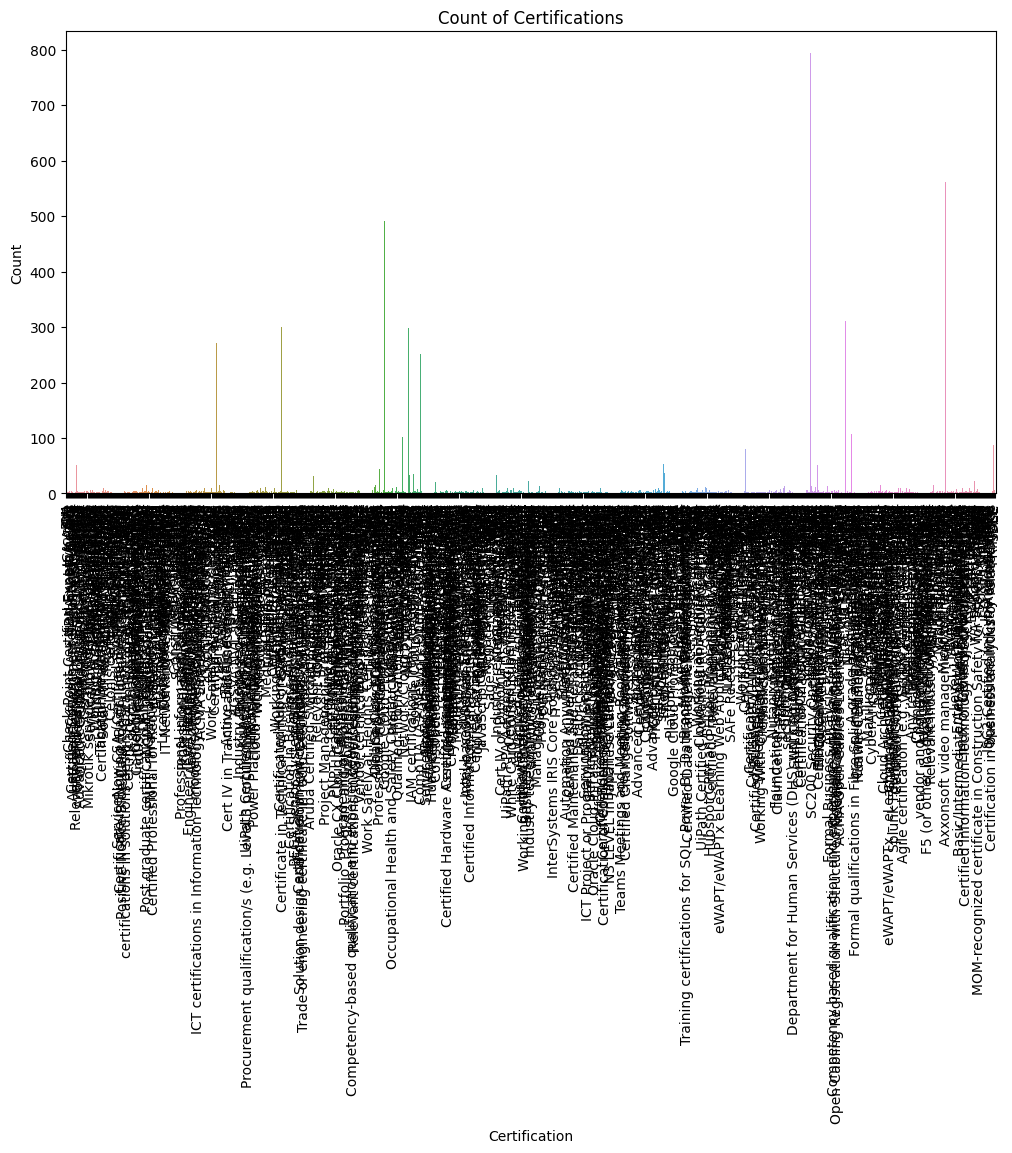

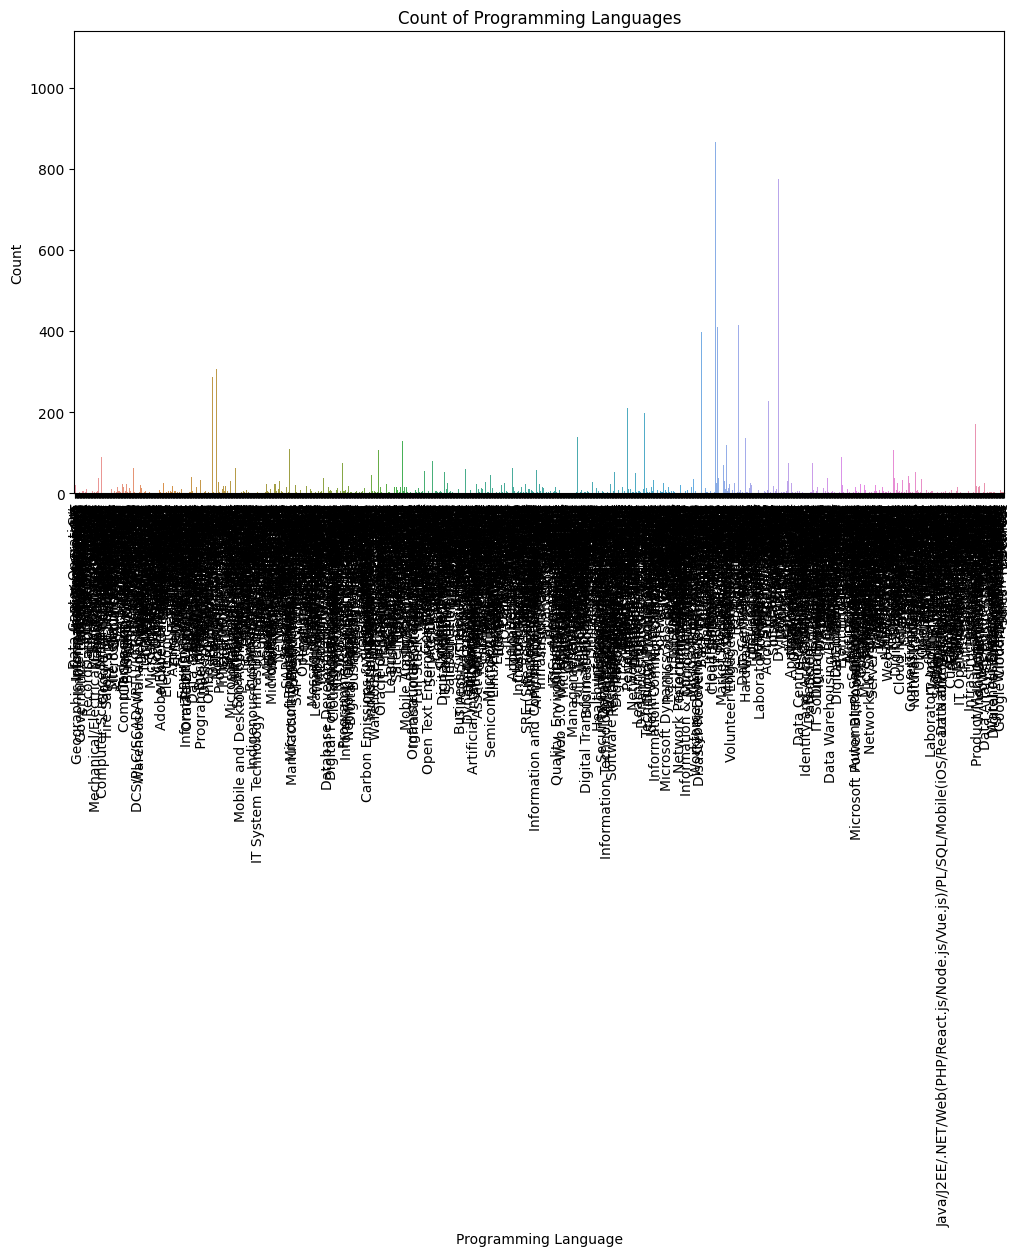

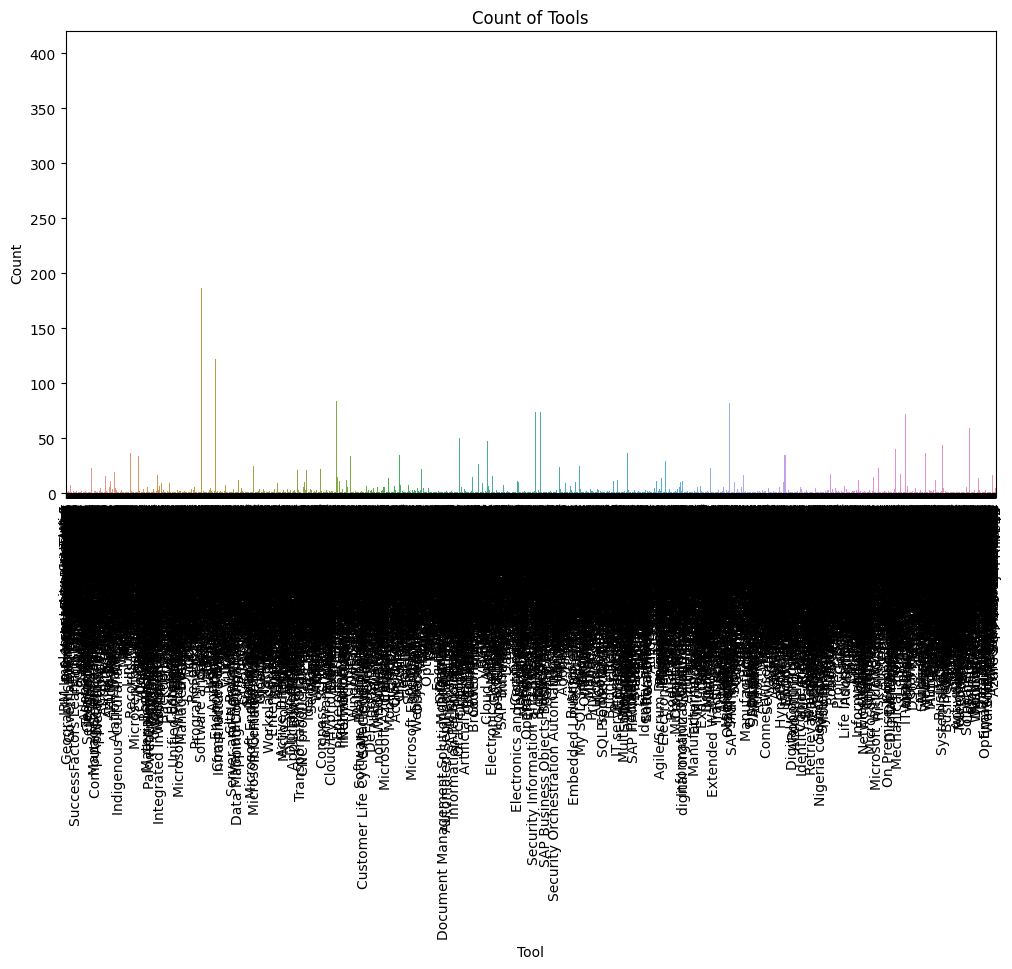

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-459906504280746>, line 46
     43 plt.show()
     45 # Correlate the counts of certifications, programming languages, and tools
---> 46 correlation_df = certification_counts.join(language_counts, "certification") \
     47     .join(tool_counts, "certification")
     49 # Convert the DataFrame to a Pandas DataFrame for easy manipulation and visualization
     50 correlation_pd = correlation_df.toPandas()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each certification
certification_counts = itjob_df.groupBy("certification").count()

# Count the occurrences of each programming language
language_counts = itjob_df.groupBy("specialisation").count()

# Count the occurrences of each tool
tool_counts = itjob_df.groupBy("additional_specialisation").count()

# Convert the DataFrames to Pandas DataFrames for easy manipulation and visualization
certification_counts_pd = certification_counts.toPandas()
language_counts_pd = language_counts.toPandas()
tool_counts_pd = tool_counts.toPandas()

# Plot the certification counts
plt.figure(figsize=(12, 6))
sns.barplot(data=certification_counts_pd, x="certification", y="count")
plt.xlabel("Certification")
plt.ylabel("Count")
plt.title("Count of Certifications")
plt.xticks(rotation=90)
plt.show()

# Plot the language counts
plt.figure(figsize=(12, 6))
sns.barplot(data=language_counts_pd, x="specialisation", y="count")
plt.xlabel("Programming Language")
plt.ylabel("Count")
plt.title("Count of Programming Languages")
plt.xticks(rotation=90)
plt.show()

# Plot the tool counts
plt.figure(figsize=(12, 6))
sns.barplot(data=tool_counts_pd, x="additional_specialisation", y="count")
plt.xlabel("Tool")
plt.ylabel("Count")
plt.title("Count of Tools")
plt.xticks(rotation=90)
plt.show()

# Correlate the counts of certifications, programming languages, and tools
correlation_df = certification_counts.join(language_counts, "certification") \
    .join(tool_counts, "certification")

# Convert the DataFrame to a Pandas DataFrame for easy manipulation and visualization
correlation_pd = correlation_df.toPandas()

# Plot the correlation between certifications, programming languages, and tools
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_pd.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Certifications, Programming Languages, and Tools")
plt.show()

## Calculate the distribution of salary for top 10 popular specialisations  in australia and philipines, generate graph

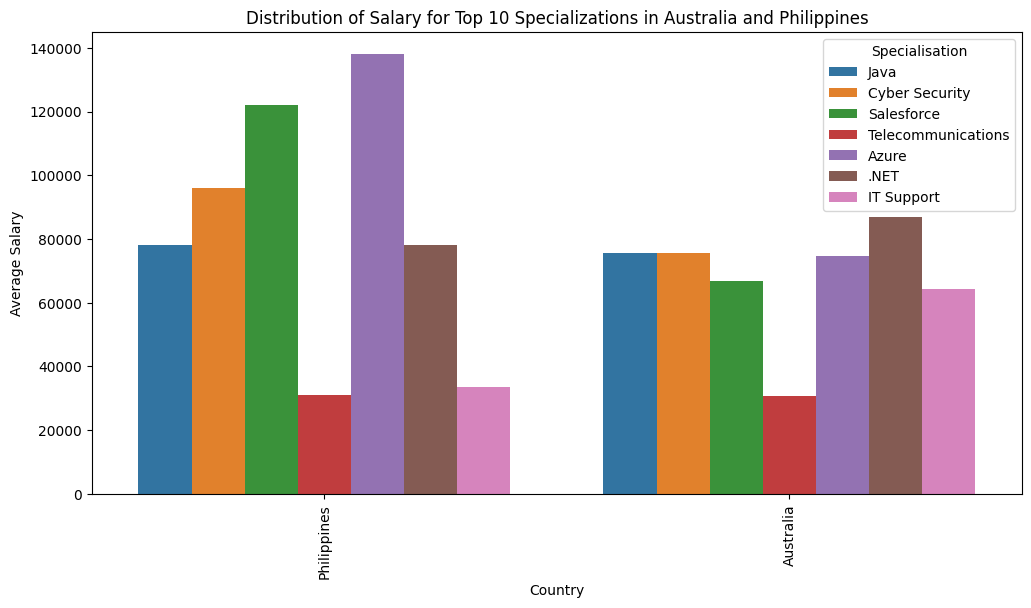

In [0]:
# Filter the salary distribution DataFrame for Australia and Philippines
salary_distribution_top_10_filtered = salary_distribution_top_10_pd[
    salary_distribution_top_10_pd["country"].isin(["Australia", "Philippines"])
]

# Plot the salary distribution graph for the top 10 specializations in Australia and Philippines
plt.figure(figsize=(12, 6))
sns.barplot(
    data=salary_distribution_top_10_filtered,
    x="country",
    y="avg(salary_from)",
    hue="specialisation"
)
plt.xlabel("Country")
plt.ylabel("Average Salary")
plt.title("Distribution of Salary for Top 10 Specializations in Australia and Philippines")
plt.xticks(rotation=90)
plt.legend(title="Specialisation")
plt.show()